In [1]:
import numpy as np
# finding identity matrix
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [2]:
import pandas as pd
df=pd.read_csv("C:/Users/OSAGIE/Desktop/fuel_ferc1.csv")
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [3]:
#Grouping of fuel type  with year and summing the fuel cost per unit burned
df.groupby(['fuel_type_code_pudl','report_year'])['fuel_cost_per_unit_burned'].sum()

fuel_type_code_pudl  report_year
coal                 1994           14984.572
                     1995           14571.785
                     1996           12694.803
                     1997           43742.178
                     1998           11902.597
                                      ...    
waste                2014             591.594
                     2015             629.270
                     2016             539.079
                     2017             452.079
                     2018             660.972
Name: fuel_cost_per_unit_burned, Length: 148, dtype: float64

In [4]:
# calculating the percentage change
per_change_coal=(11902.597-14984.572)/14984.572*100
per_change_coal

-20.567654518260518

In [5]:
#checking for missing values in the dataset
df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

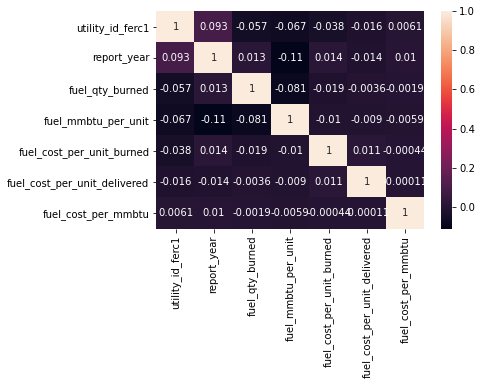

In [6]:
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting
# Getting the correlation of feactures
sns.heatmap(df.corr(), annot=True)

In [7]:
#calculating the average fuel cost per unit delivered group by year
df.groupby('report_year')['fuel_cost_per_unit_delivered'].mean()

report_year
1994       63.636060
1995       32.735269
1996     9196.705948
1997    11140.197239
1998      287.154420
1999       25.551627
2000      985.362877
2001       60.050396
2002       47.594361
2003       55.663493
2004      139.524275
2005       41.438184
2006       38.657484
2007       43.325023
2008       58.588197
2009      652.694163
2010       91.862105
2011       59.774667
2012       60.994502
2013      172.307591
2014      192.737183
2015      326.535511
2016      103.901761
2017       46.196861
2018      499.269966
Name: fuel_cost_per_unit_delivered, dtype: float64

In [8]:
# Function to calculate missing values by column
def missing_values_table(data):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
#displaying percentage of missing values
missing_values_table(df)

Your selected dataframe has 11 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
fuel_unit,180,0.6


In [10]:
#Replacing the fuel unit colunm with the most frequent unit  for the missing unit
df.fuel_unit=df.fuel_unit.fillna('mcf')

In [11]:
#Caculating the skewness of fuel quantity burned
df['fuel_qty_burned'].skew(axis=0)

15.851495469109503

In [12]:
#Caculating the kurtosis of fuel quantity burned
df['fuel_qty_burned'].kurtosis(axis=0)

651.3694501337732

In [13]:
# Getting the summary statistic of fuel mmbtu per unit
df['fuel_mmbtu_per_unit'].describe()

count    29523.000000
mean         8.492111
std         10.600220
min          0.000001
25%          1.024000
50%          5.762694
75%         17.006000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

In [14]:
# calculating the average of fuel cost per uint burned
df.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean()

fuel_type_code_pudl
coal         67.421830
gas          13.659397
nuclear    4955.157002
oil         168.877086
other        18.253856
waste        19.518122
Name: fuel_cost_per_unit_burned, dtype: float64